Video Source : https://www.youtube.com/watch?v=r0s4slGHwzE&list=PLeo1K3hjS3uvMADnFjV1yg6E5nVU4kOob
        
Dataset : C:\Users\mayan\aapl.csv
    https://github.com/codebasics/py/tree/master/pandas/14_ts_datetimeindex

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('aapl.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,7-Jul-17,142.90,144.75,142.90,144.18,19201712
1,6-Jul-17,143.02,143.50,142.41,142.73,24128782
2,5-Jul-17,143.69,144.79,142.72,144.09,21569557
3,3-Jul-17,144.88,145.30,143.10,143.50,14277848
4,30-Jun-17,144.45,144.96,143.78,144.02,23024107


In [4]:
type(df.Date[0])

str

In [6]:
# To parse the field into Date-Time.
# In the parse_dates list mention all the fields which we need to convert from string into dates-time.
df_d = pd.read_csv('aapl.csv', parse_dates = ["Date"])

type(df_d.Date[0])

pandas._libs.tslib.Timestamp

In [7]:
df_d.head()

,Date,Open,High,Low,Close,Volume
0,2017-07-07,142.90,144.75,142.90,144.18,19201712
1,2017-07-06,143.02,143.50,142.41,142.73,24128782
2,2017-07-05,143.69,144.79,142.72,144.09,21569557
3,2017-07-03,144.88,145.30,143.10,143.50,14277848
4,2017-06-30,144.45,144.96,143.78,144.02,23024107


In [8]:
# Changing the Index to Date field.
df_di = pd.read_csv('aapl.csv', parse_dates = ["Date"], index_col = "Date")
df_di.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


In [9]:
df_di.index

DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [10]:
# Reason for parsing the index into DatetimeIndex, is we can filter the data easily.
# Retrive only Jan 2017 stock prices. It can be done easily as below.
df_di["2017-01"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


In [12]:
# Find Average price of Apple's stock in Jan 2017
df_di["2017-01"].Close.mean()

119.57000000000001

In [13]:
# Retrive the price on any given date (03 Jan 2017)
df_di["2017-01-03"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,115.8,116.33,114.76,116.15,28781865


In [16]:
# Date Range
# Note : End range is included here.
df_di["2017-01-06" : "2017-01-01"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-06,116.78,118.16,116.47,117.91,31751900
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-03,115.80,116.33,114.76,116.15,28781865


In [17]:
# Retrive monthly data : Monthly stock price for Apple
# 'M' is for Monthly frequency.
# Similarly we can do it as 'B' for Business day; 'W' Weekly Frequency; 'A' for Annual or Year end frequency; 'H' Hourly freq.; 'Q' Quarter end freq.

df_di.Close.resample('M').mean()

Date
2016-07-31     99.473333
2016-08-31    107.665217
2016-09-30    110.857143
2016-10-31    115.707143
2016-11-30    110.154286
2016-12-31    114.335714
2017-01-31    119.570000
2017-02-28    133.713684
2017-03-31    140.617826
2017-04-30    142.886842
2017-05-31    152.227727
2017-06-30    147.831364
2017-07-31    143.625000
Freq: M, Name: Close, dtype: float64

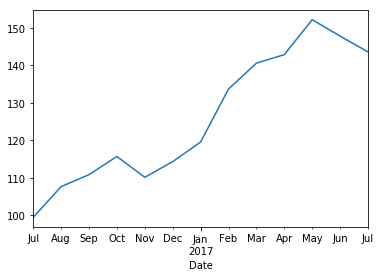

In [18]:
%matplotlib inline
df_di.Close.resample('M').mean().plot()

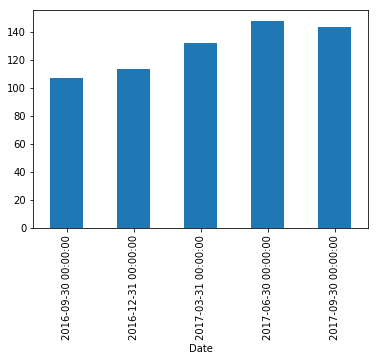

In [20]:
df_di.Close.resample('Q').mean().plot(kind = "bar")

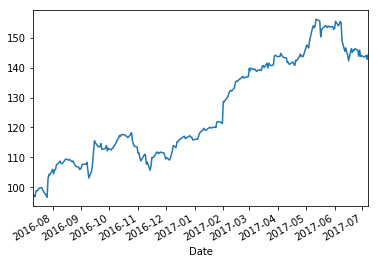

In [21]:
df_di.Close.plot()

Please check the next example "Example - TimeSeries_DateRange"